# Data from https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Stroke-Mortality-Data-Among-US-Adults-35-by-State-/tqwu-4a7k 

# https://data.cdc.gov/browse?limitTo=datasets&q=stroke&sortBy=last_modified&utf8=%E2%9C%93

In [27]:
# make sure to install this package before running:
# python -m pip install --upgrade pip
!pip install sodapy

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

from sodapy import Socrata

National Vital Statistics System (NVSS) - National Cardiovascular Disease Surveillance Data
Dataset Identifier: kztq-p2jf
Total Rows: 158080
Source Domain: chronicdata.cdc.gov

Stroke Mortality Data Among US Adults (35+) by State/Territory and County 2016-2018
Dataset Identifier: tqwu-4a7k
Total Rows: 59094
Source Domain: chronicdata.cdc.gov








In [30]:
# data
# data = "assets/data/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv"

# The Host Name for the API endpoint (the https:// part will be added automatically)

data_url='chronicdata.cdc.gov'

# The data set at the API endpoint 
data_set="tqwu-4a7k"   

# The app token created in the prior steps
MyAppToken='px7JjOQLMt0zT2f5o7utbLBcj'
username="mpmarinkovic@gmail.com"
password="!00Hagase"

# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

     
# Set the timeout to 60 seconds    
client.timeout = 60
print (client)


In [31]:
# Get metadata about the target data set
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon']

In [32]:
# The SoDaPy library converts this JSON object to a Python list of dictionaries
# SODA APIs are paged, and return a maximum of 50,000 records per page
# good practice to split up the request into multiple smaller queries 

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break


# results = client.get(data_set, limit=2000)

In [33]:
# Convert the list of dictionaries to a Pandas data frame
data_df = pd.DataFrame.from_records(results)
data_df.head(10)
# Save the data frame to a CSV file
# df.to_csv("my_311_data.csv")

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Stroke Mortality,2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02013,55.442393334,-161.9599296,NaN,NaN
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Stroke Mortality,0,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02016,53.648343064,-166.9175329,NaN,NaN
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Stroke Mortality,67.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02020,61.159144533,-149.1045591,NaN,NaN
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Stroke Mortality,104.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02050,60.923647647,-159.7532618,NaN,NaN
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02060,58.753495988,-156.694662,~,Insufficient Data
5,2017,AK,Denali,County,NVSS,Cardiovascular Diseases,Stroke Mortality,75.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02068,63.67881971,-149.9608012,NaN,NaN
6,2017,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Stroke Mortality,119,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02070,59.803703891,-158.1813501,NaN,NaN
7,2017,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Stroke Mortality,100.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02090,64.809319444,-146.5842931,NaN,NaN
8,2017,AK,Haines,County,NVSS,Cardiovascular Diseases,Stroke Mortality,52.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02100,59.141478853,-135.5151943,NaN,NaN
9,2017,AK,Hoonah-Angoon,County,NVSS,Cardiovascular Diseases,Stroke Mortality,48.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02105,58.717908328,-137.1866487,NaN,NaN


In [ ]:
# Check datacounts
data_df.count()

In [35]:
# Check datatypes
data_df.dtypes

year                          object
locationabbr                  object
locationdesc                  object
geographiclevel               object
datasource                    object
class                         object
topic                         object
data_value                    object
data_value_unit               object
data_value_type               object
stratificationcategory1       object
stratification1               object
stratificationcategory2       object
stratification2               object
topicid                       object
locationid                    object
y_lat                         object
x_lon                         object
data_value_footnote_symbol    object
data_value_footnote           object
dtype: object

In [48]:
# reorganize columns
datasub_df = data_df[[ 'locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'data_value','data_value_unit', 'class','topic',
                      'stratificationcategory1', 'stratification1' ,'stratificationcategory2' , 'stratification2' ,'year']]          


datasub_df.head()

,locationid,locationabbr,locationdesc,y_lat,x_lon,data_value,data_value_unit,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year
0,02013,AK,Aleutians East,55.442393334,-161.9599296,2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
1,02016,AK,Aleutians West,53.648343064,-166.9175329,0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
2,02020,AK,Anchorage,61.159144533,-149.1045591,67.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
3,02050,AK,Bethel,60.923647647,-159.7532618,104.6,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
4,02060,AK,Bristol Bay,58.753495988,-156.694662,NaN,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017


In [51]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"long","locationabbr":"state", "locationdesc": "county"})

datasub_df.head() 

,locationID,state,county,Lat,Long,data_value,data_value_unit,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year
0,02013,AK,Aleutians East,55.442393334,-161.9599296,2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
1,02016,AK,Aleutians West,53.648343064,-166.9175329,0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
2,02020,AK,Anchorage,61.159144533,-149.1045591,67.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
3,02050,AK,Bethel,60.923647647,-159.7532618,104.6,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017
4,02060,AK,Bristol Bay,58.753495988,-156.694662,NaN,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017


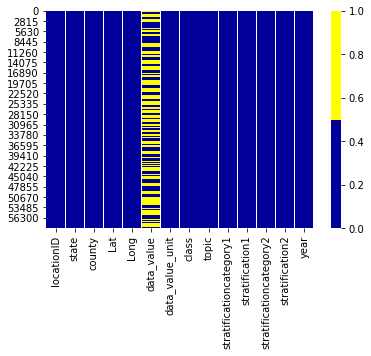

In [53]:
#cleaing data

cols = datasub_df.columns[:20] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(datasub_df[cols].isnull(), cmap=sns.color_palette(colours))

In [54]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in datasub_df.columns:
    pct_missing = np.mean(datasub_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

locationID - 0.0%
state - 0.0%
county - 0.0%
Lat - 0.0%
Long - 0.0%
data_value - 52.0%
data_value_unit - 0.0%
class - 0.0%
topic - 0.0%
stratificationcategory1 - 0.0%
stratification1 - 0.0%
stratificationcategory2 - 0.0%
stratification2 - 0.0%
year - 0.0%


In [ ]:
#drop the rows that has counties with missing values
clean_df= datasub_df.dropna()
clean_df.head()

In [ ]:
# Save Cleaned/Organized df to csv
clean_df.to_csv("assets/data/stroke_death_clean.csv", index=False)
